# Part 1 (implemented in 90mns)

Load the Data

In [11]:
import pandas as pd

# Load the Excel file
file_path = 'YouGov_2024_general_election_MRP_2.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
data.head()


,area,region,const,ConShare,LabShare,LibDemShare,GreenShare,ReformShare,PlaidShare,SNPShare,OthersShare,WinnerGE2024,SecondGE2024,YouGovCall,Winner margin,2019 v 2024 status,Win19 (nominal),constituency_type
0,Aldridge-Brownhills,West Midlands,E14001064,0.39,0.32,0.05,0.04,0.19,0.0,0.0,0.00,Conservatives,Labour,Lean Conservatives,0.07,Conservative hold,Con,Borough
1,Arundel and South Downs,South East,E14001067,0.41,0.20,0.15,0.07,0.17,0.0,0.0,0.00,Conservatives,Labour,Likely Conservatives,0.21,Conservative hold,Con,County
2,Beaconsfield,South East,E14001082,0.38,0.27,0.11,0.05,0.19,0.0,0.0,0.00,Conservatives,Labour,Likely Conservatives,0.11,Conservative hold,Con,County
3,Boston and Skegness,East Midlands,E14001114,0.37,0.26,0.05,0.02,0.29,0.0,0.0,0.00,Conservatives,Reform,Lean Conservatives,0.08,Conservative hold,Con,County
4,Braintree,East of England,E14001121,0.34,0.31,0.07,0.04,0.22,0.0,0.0,0.01,Conservatives,Labour,Tossup,0.03,Conservative hold,Con,County


Step 2: Data Cleaning and Preprocessing

In [21]:
# Check for missing values
missing_values = data.isnull().sum()

# Basic statistics of the dataframe
data_stats = data.describe()

missing_values, data_stats


(area                  0
 region                0
 const                 0
 ConShare              0
 LabShare              0
 LibDemShare           0
 GreenShare            0
 ReformShare           0
 PlaidShare            0
 SNPShare              0
 OthersShare           0
 WinnerGE2024          0
 SecondGE2024          0
 YouGovCall            0
 Winner margin         0
 2019 v 2024 status    0
 Win19 (nominal)       0
 constituency_type     0
 dtype: int64,
          ConShare    LabShare  LibDemShare  GreenShare  ReformShare  \
 count  631.000000  631.000000   631.000000  631.000000   631.000000   
 mean     0.218526    0.386719     0.116862    0.066910     0.154834   
 std      0.111144    0.154638     0.127817    0.044655     0.066761   
 min      0.000000    0.060000     0.000000    0.000000     0.000000   
 25%      0.110000    0.290000     0.050000    0.040000     0.110000   
 50%      0.240000    0.410000     0.070000    0.060000     0.160000   
 75%      0.310000    0.500000 

EDA



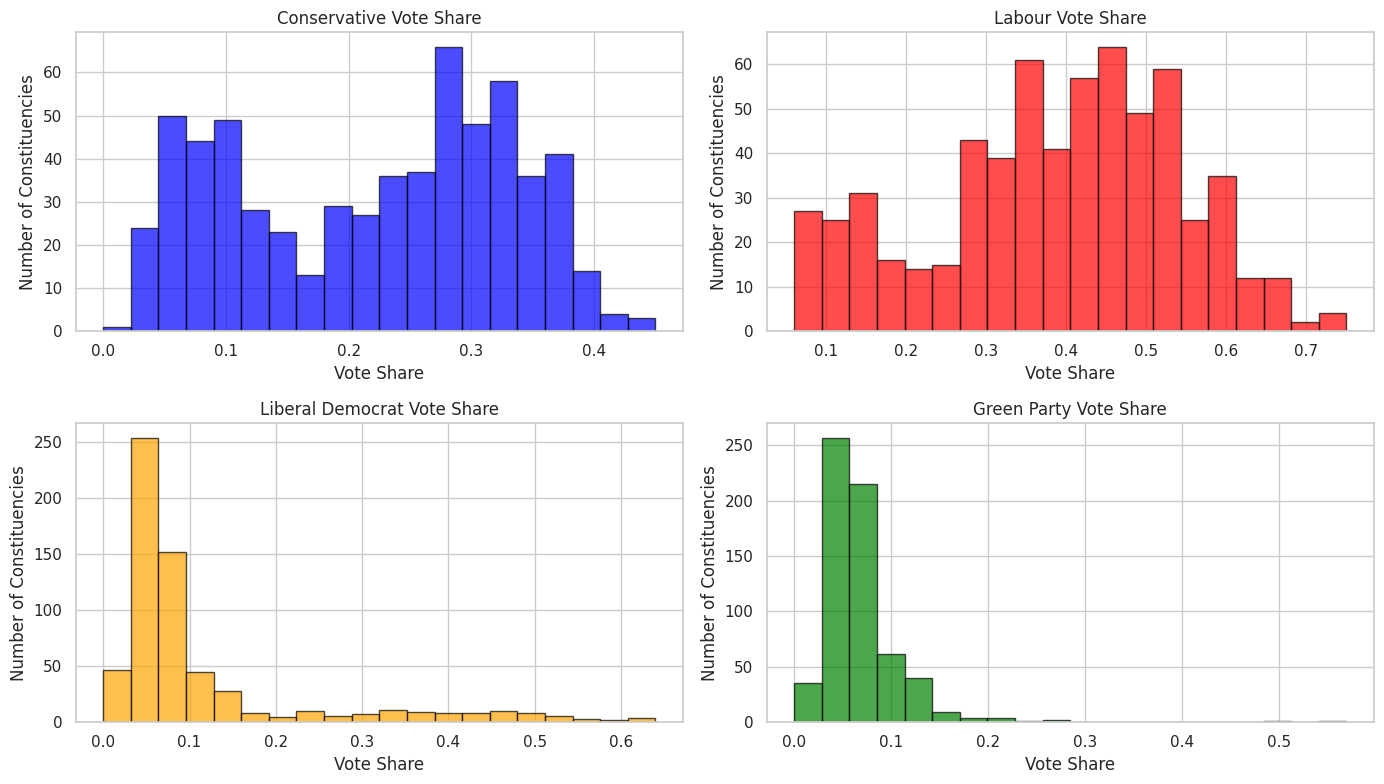

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot histograms for the vote shares of major parties
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.hist(data['ConShare'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Conservative Vote Share')
plt.xlabel('Vote Share')
plt.ylabel('Number of Constituencies')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.hist(data['LabShare'], bins=20, color='red', alpha=0.7, edgecolor='black')
plt.title('Labour Vote Share')
plt.xlabel('Vote Share')
plt.ylabel('Number of Constituencies')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(data['LibDemShare'], bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.title('Liberal Democrat Vote Share')
plt.xlabel('Vote Share')
plt.ylabel('Number of Constituencies')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.hist(data['GreenShare'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title('Green Party Vote Share')
plt.xlabel('Vote Share')
plt.ylabel('Number of Constituencies')
plt.grid(True)

plt.tight_layout()
plt.show()


# Count the number of constituencies each party is projected to win

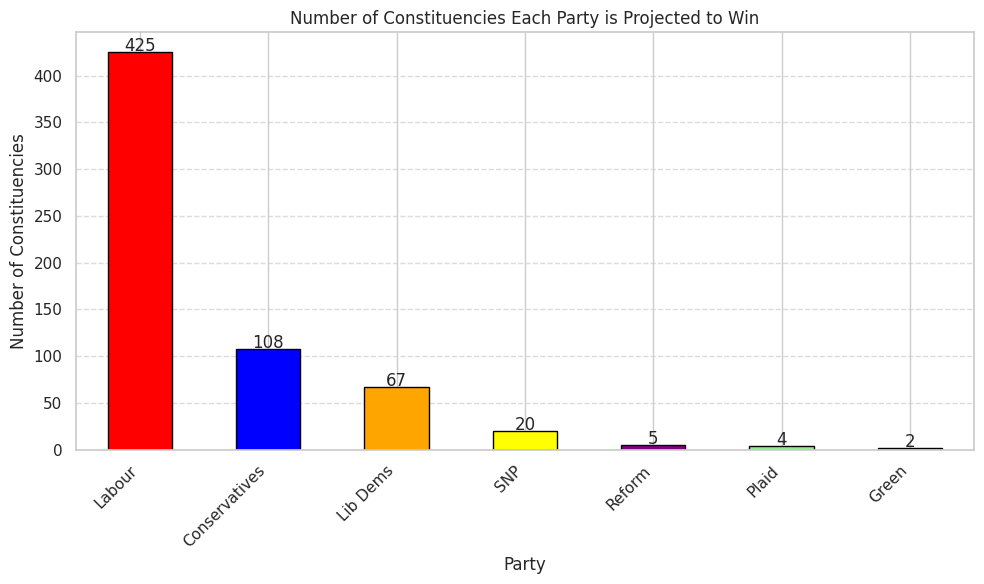

In [28]:
# Count the number of constituencies each party is projected to win
winner_counts = data['WinnerGE2024'].value_counts()

# Plot the number of constituencies each party is projected to win
plt.figure(figsize=(10, 6))
colors = [party_colors[party] for party in winner_counts.index]
winner_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Number of Constituencies Each Party is Projected to Win')
plt.xlabel('Party')
plt.ylabel('Number of Constituencies')
plt.xticks(rotation=45, ha='right')
for index, value in enumerate(winner_counts):
    plt.text(index, value + 1, str(value), ha='center')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# bar chart to visualize the projected distribution of winning parties across different regions

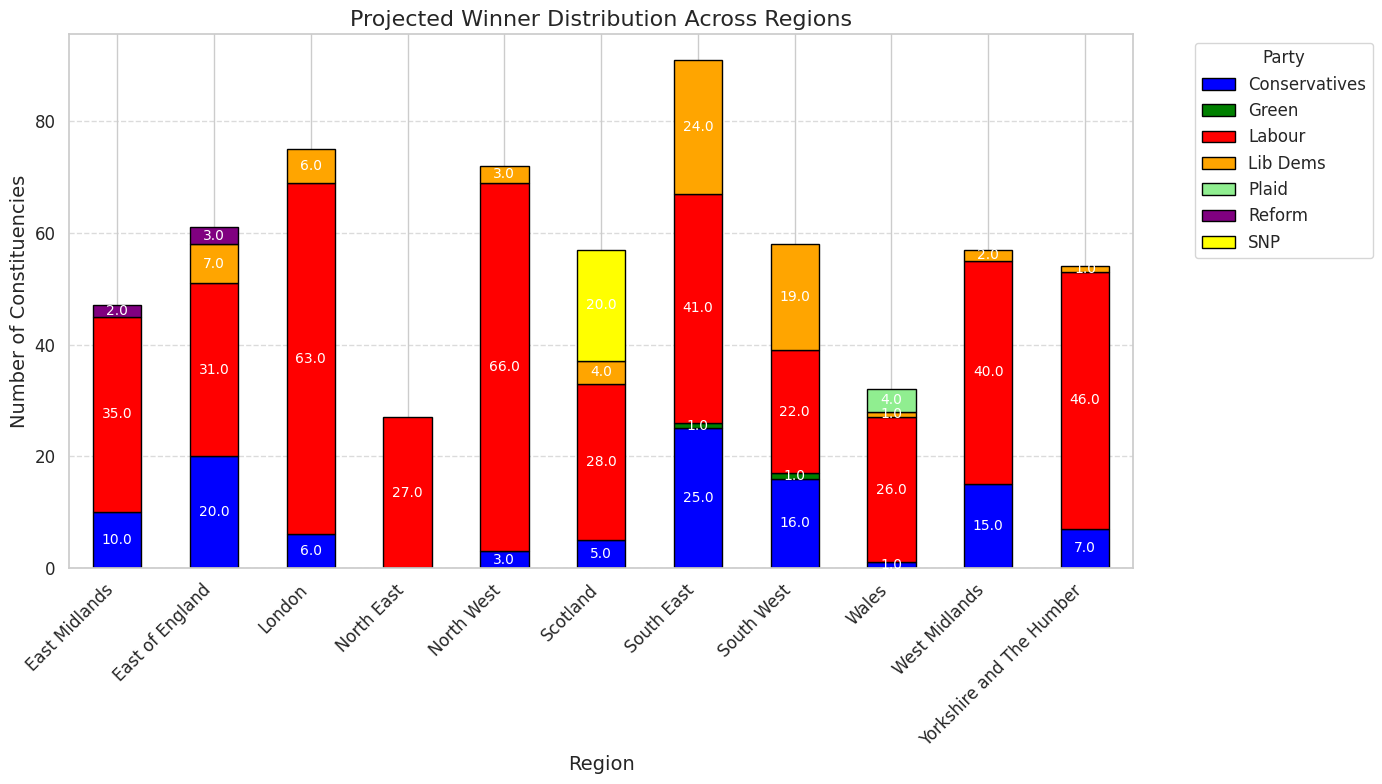

In [33]:
import matplotlib.pyplot as plt

# Define party colors to ensure consistency
party_colors = {
    'Conservatives': 'blue',
    'Labour': 'red',
    'Lib Dems': 'orange',
    'Green': 'green',
    'SNP': 'yellow',
    'Reform': 'purple',
    'Plaid': 'lightgreen',
    'Others': 'grey'
}

# Analyze the projected winner distribution across different regions
regional_winners = data.groupby(['region', 'WinnerGE2024']).size().unstack(fill_value=0)

# Plot the projected winner distribution across different regions
fig, ax = plt.subplots(figsize=(14, 8))
colors = [party_colors.get(party, 'grey') for party in regional_winners.columns]
regional_winners.plot(kind='bar', stacked=True, color=colors, edgecolor='black', ax=ax)

# Adding annotations
for container in ax.containers:
    labels = [f'{v.get_height()}' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='white')

plt.title('Projected Winner Distribution Across Regions', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Constituencies', fontsize=14)
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Key observations:

The Conservative (Con) and Labour (Lab) parties dominate most regions, with varying degrees of support.

The Liberal Democrats (LibDem) and Green parties have notable support in some regions but are generally smaller in share compared to the main parties.

The Reform party has significant support in certain regions.
Regional parties like Plaid Cymru and SNP have strong support in Wales and Scotland, respectively.

## Categorize Confidence Levels

inspecting the unique values in the "YouGovCall" column

In [35]:
# Inspect unique values in the YouGovCall column
unique_calls = data['YouGovCall'].unique()
unique_calls


array(['Lean Conservatives', 'Likely Conservatives', 'Tossup',
       'Safe Green', 'Lean Labour', 'Likely Labour', 'Safe Labour',
       'Likely Green', 'Safe Lib Dems', 'Likely Lib Dems',
       'Lean Lib Dems', 'Lean Plaid', 'Likely Plaid', 'Safe Plaid',
       'Likely Reform', 'Lean SNP', 'Likely SNP'], dtype=object)

Inspecting the Confidence Levels

In [36]:
# Inspect unique values in the YouGovCall column
unique_calls = data['YouGovCall'].unique()
print(unique_calls)


['Lean Conservatives' 'Likely Conservatives' 'Tossup' 'Safe Green'
 'Lean Labour' 'Likely Labour' 'Safe Labour' 'Likely Green'
 'Safe Lib Dems' 'Likely Lib Dems' 'Lean Lib Dems' 'Lean Plaid'
 'Likely Plaid' 'Safe Plaid' 'Likely Reform' 'Lean SNP' 'Likely SNP']


 Categorize Confidence Levels





In [37]:
confidence_categories = {
    'Likely Conservatives': 'High Confidence',
    'Lean Conservatives': 'Medium Confidence',
    'Likely Labour': 'High Confidence',
    'Lean Labour': 'Medium Confidence',
    'Likely Lib Dems': 'High Confidence',
    'Lean Lib Dems': 'Medium Confidence',
    'Likely SNP': 'High Confidence',
    'Lean SNP': 'Medium Confidence',
    'Tossup': 'Low Confidence',
    # Add other categories if needed
}


In [39]:
data['ConfidenceLevel'] = data['YouGovCall'].map(confidence_categories)


 Count Constituencies by Confidence Level


In [40]:
confidence_counts = data['ConfidenceLevel'].value_counts()
print(confidence_counts)


ConfidenceLevel
High Confidence      210
Low Confidence       109
Medium Confidence    101
Name: count, dtype: int64


Visualize the Confidence Levels

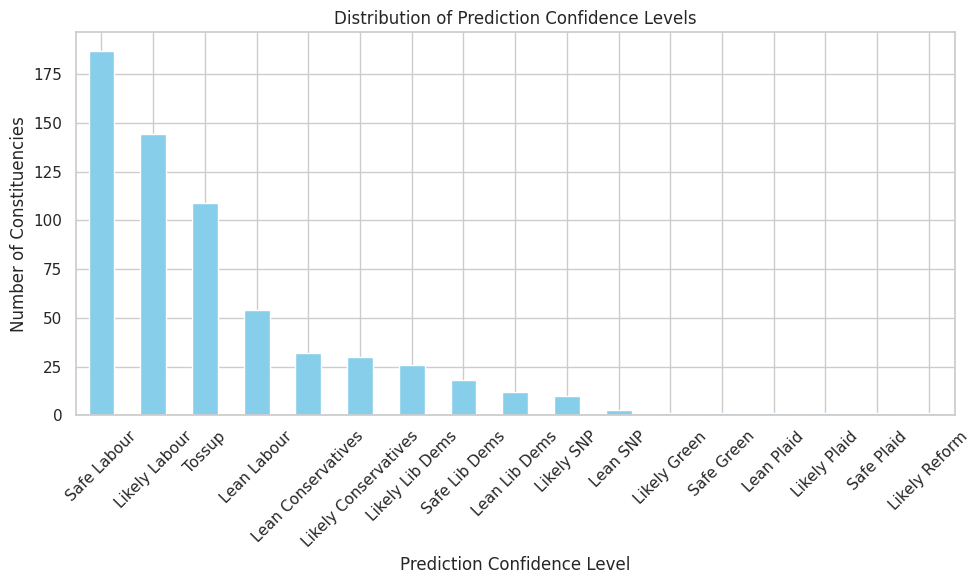

In [44]:

# Count the occurrences of each prediction confidence level
prediction_confidence_counts = df['YouGovCall'].value_counts()

# Plotting the distribution of prediction confidence levels
plt.figure(figsize=(10, 6))
prediction_confidence_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Prediction Confidence Levels')
plt.xlabel('Prediction Confidence Level')
plt.ylabel('Number of Constituencies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## identify and plot the Conservative and Labour strongholds by region:

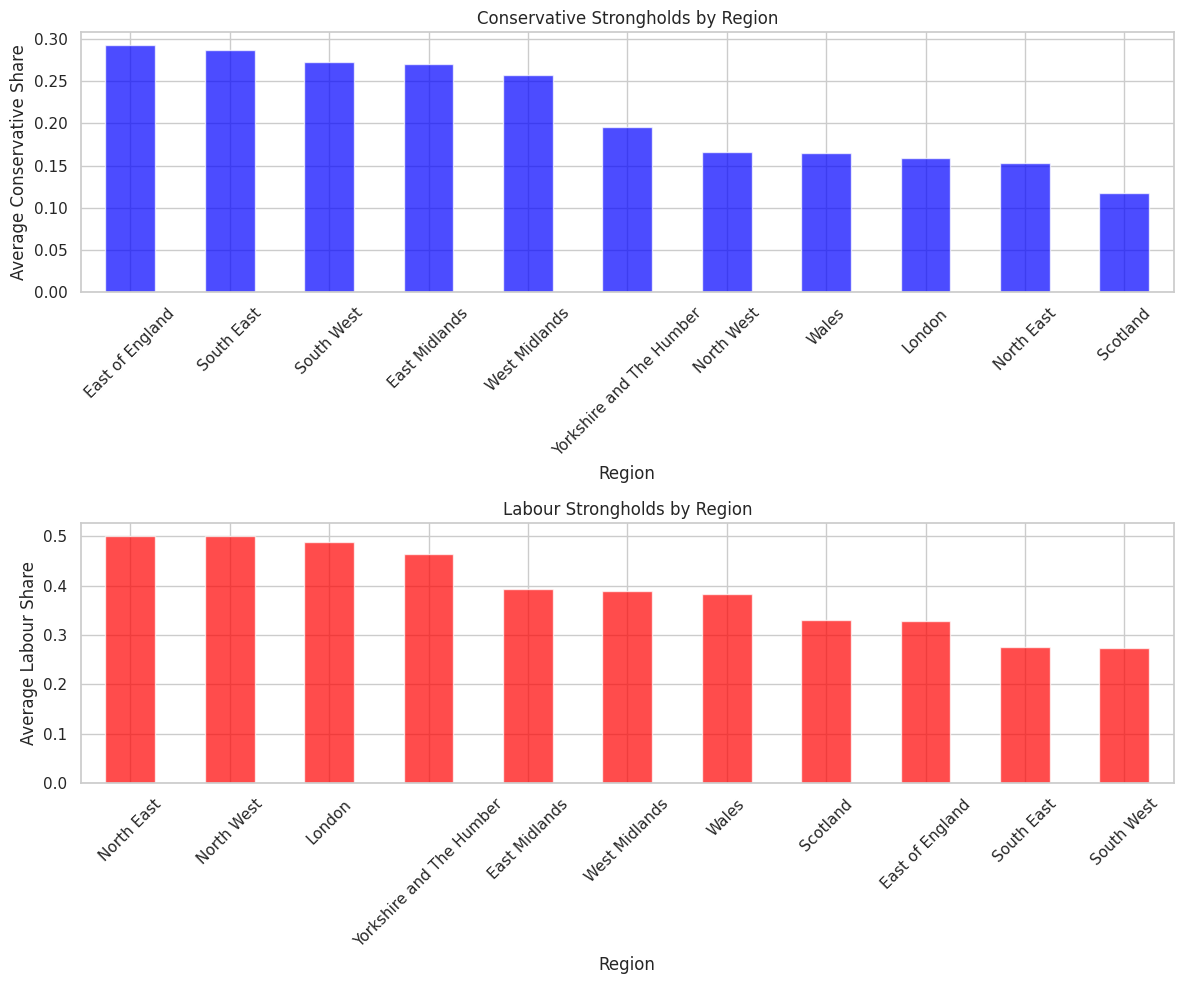

In [103]:
# Identify Conservative and Labour strongholds
con_strongholds = df.groupby('region')['ConShare'].mean().sort_values(ascending=False)
lab_strongholds = df.groupby('region')['LabShare'].mean().sort_values(ascending=False)

# Plot Conservative and Labour strongholds
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

con_strongholds.plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Conservative Strongholds by Region')
axes[0].set_ylabel('Average Conservative Share')
axes[0].set_xlabel('Region')
axes[0].set_xticklabels(con_strongholds.index, rotation=45)

lab_strongholds.plot(kind='bar', ax=axes[1], color='red', alpha=0.7)
axes[1].set_title('Labour Strongholds by Region')
axes[1].set_ylabel('Average Labour Share')
axes[1].set_xlabel('Region')
axes[1].set_xticklabels(lab_strongholds.index, rotation=45)

plt.tight_layout()
plt.show()


## performing the swing analysis for the Conservative and Labour parties

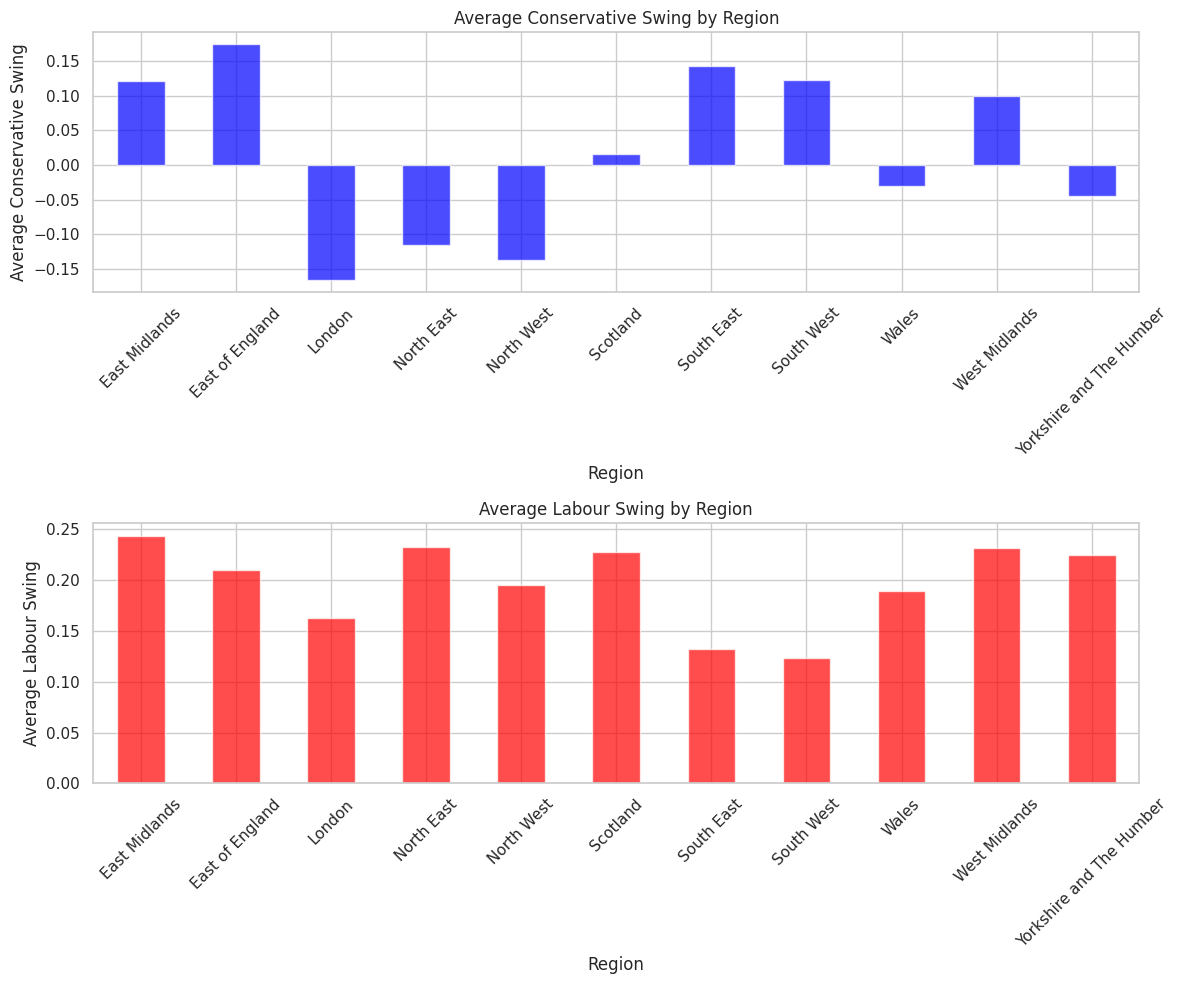

In [104]:
# Calculating swing for Conservatives and Labour
df['ConSwing'] = df['ConShare'] - df['Winner margin']
df['LabSwing'] = df['LabShare'] - df['Winner margin']

# Average swing by region
con_swing_by_region = df.groupby('region')['ConSwing'].mean()
lab_swing_by_region = df.groupby('region')['LabSwing'].mean()

# Plot Conservative and Labour swings
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

con_swing_by_region.plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Average Conservative Swing by Region')
axes[0].set_ylabel('Average Conservative Swing')
axes[0].set_xlabel('Region')
axes[0].set_xticklabels(con_swing_by_region.index, rotation=45)

lab_swing_by_region.plot(kind='bar', ax=axes[1], color='red', alpha=0.7)
axes[1].set_title('Average Labour Swing by Region')
axes[1].set_ylabel('Average Labour Swing')
axes[1].set_xlabel('Region')
axes[1].set_xticklabels(lab_swing_by_region.index, rotation=45)

plt.tight_layout()
plt.show()


#Additional experments with the data if additional time was given

Calculate Total Seats and Majority Threshold

In [50]:
# Calculate the total number of constituencies
total_seats = data.shape[0]

# Determine the majority threshold
majority_threshold = total_seats / 2 + 1

print(f"Total Seats: {total_seats}")
print(f"Majority Threshold: {majority_threshold}")


Total Seats: 631
Majority Threshold: 316.5


## Calculate Projected Seats for Each Party

In [51]:
# Calculate the number of seats each party is projected to win
seat_counts = data['WinnerGE2024'].value_counts()

# Display the results
seat_counts


WinnerGE2024
Labour           425
Conservatives    108
Lib Dems          67
SNP               20
Reform             5
Plaid              4
Green              2
Name: count, dtype: int64

## Analyze Possible Coalitions

We will analyze some common coalition scenarios, such as:

Conservative + Liberal Democrat

Labour + Liberal Democrat

Labour + Green

Conservative + Reform

In [52]:
# Define coalition scenarios
coalitions = {
    'Conservative + Liberal Democrat': seat_counts.get('Conservatives', 0) + seat_counts.get('Liberal Democrat', 0),
    'Labour + Liberal Democrat': seat_counts.get('Labour', 0) + seat_counts.get('Liberal Democrat', 0),
    'Labour + Green': seat_counts.get('Labour', 0) + seat_counts.get('Green', 0),
    'Conservative + Reform': seat_counts.get('Conservatives', 0) + seat_counts.get('Reform', 0),
}

# Determine which coalitions can form a majority
majority_coalitions = {coalition: seats for coalition, seats in coalitions.items() if seats >= majority_threshold}

print("Possible Majorities:")
for coalition, seats in majority_coalitions.items():
    print(f"{coalition}: {seats} seats")


Possible Majorities:
Labour + Liberal Democrat: 425 seats
Labour + Green: 427 seats


## Overall Party Share Analysis



In [67]:
import pandas as pd

# Load the Excel file
file_path = 'YouGov_2024_general_election_MRP_2.xlsx'
df = pd.read_excel(file_path, sheet_name='data-5sWjS (1)')


In [68]:
# Overall Party Share Analysis
overall_shares = {
    'Conservative': df['ConShare'].mean(),
    'Labour': df['LabShare'].mean(),
    'Liberal Democrat': df['LibDemShare'].mean(),
    'Green': df['GreenShare'].mean(),
    'Reform': df['ReformShare'].mean(),
    'Plaid Cymru': df['PlaidShare'].mean(),
    'SNP': df['SNPShare'].mean(),
    'Others': df['OthersShare'].mean()
}

print("Overall Party Share Analysis:")
for party, share in overall_shares.items():
    print(f"{party}: {share:.2%}")


Overall Party Share Analysis:
Conservative: 21.85%
Labour: 38.67%
Liberal Democrat: 11.69%
Green: 6.69%
Reform: 15.48%
Plaid Cymru: 0.70%
SNP: 3.06%
Others: 1.87%


Calculates the mean (average) vote share for each party across all constituencies.

Prints out the overall party share in percentage format.

## Predicted Winners by Region

In [69]:
# Predicted Winners by Region
winners_by_region = df.groupby(['region', 'WinnerGE2024']).size().unstack(fill_value=0)
print("\nPredicted Winners by Region:")
print(winners_by_region)



Predicted Winners by Region:
WinnerGE2024              Conservatives  Green  Labour  Lib Dems  Plaid  \
region                                                                    
East Midlands                        10      0      35         0      0   
East of England                      20      0      31         7      0   
London                                6      0      63         6      0   
North East                            0      0      27         0      0   
North West                            3      0      66         3      0   
Scotland                              5      0      28         4      0   
South East                           25      1      41        24      0   
South West                           16      1      22        19      0   
Wales                                 1      0      26         1      4   
West Midlands                        15      0      40         2      0   
Yorkshire and The Humber              7      0      46         1      

Groups the data by region and the projected winner for the 2024 general election.

Counts the number of constituencies each party is predicted to win in each region.

Prints a table showing the number of predicted winners by region.

## Margin of Victory Distribution

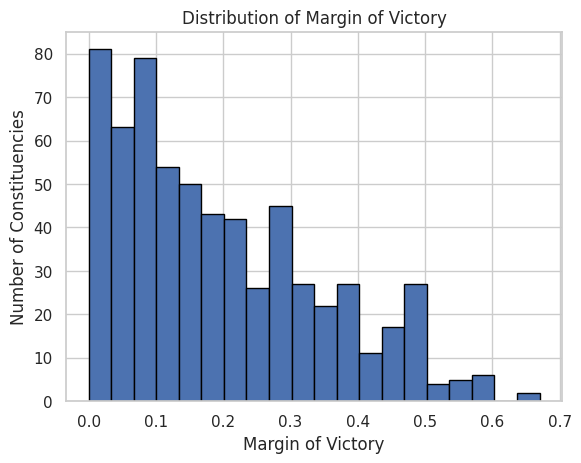

In [70]:
# Margin of Victory
import matplotlib.pyplot as plt

plt.hist(df['Winner margin'], bins=20, edgecolor='black')
plt.title('Distribution of Margin of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Number of Constituencies')
plt.show()


## Comparison of 2019 and 2024 Elections

In [71]:
# Comparison of 2019 and 2024 Elections
comparison = df.groupby(['2019 v 2024 status']).size()
print("\nComparison of 2019 and 2024 Elections:")
print(comparison)



Comparison of 2019 and 2024 Elections:
2019 v 2024 status
Conservative hold                  108
Green gain from Labour               1
Green hold                           1
Labour gain from Conservatives     199
Labour gain from SNP                27
Labour hold                        199
Lib Dem gain from Conservatives     57
Lib Dem gain from SNP                3
Lib Dem hold                         7
Plaid gain from Conservatives        2
Plaid hold                           2
Reform gain from Conservatives       5
SNP gain from Conservatives          1
SNP gain from Lib Dems               1
SNP hold                            18
dtype: int64


## Tossup Constituencies

In [72]:
# Tossup Constituencies
tossup_constituencies = df[df['YouGovCall'] == 'Tossup']
print("\nTossup Constituencies:")
print(tossup_constituencies[['area', 'region', 'WinnerGE2024', 'SecondGE2024', 'Winner margin']])



Tossup Constituencies:
                               area                    region   WinnerGE2024  \
4                         Braintree           East of England  Conservatives   
6                        Bridgwater                South West  Conservatives   
8               Brigg and Immingham  Yorkshire and The Humber  Conservatives   
9           Bromley and Biggin Hill                    London  Conservatives   
10                       Bromsgrove             West Midlands  Conservatives   
..                              ...                       ...            ...   
615          Kilmarnock and Loudoun                  Scotland            SNP   
622                  Dundee Central                  Scotland            SNP   
623  Edinburgh East and Musselburgh                  Scotland            SNP   
624       Edinburgh North and Leith                  Scotland            SNP   
626                         Falkirk                  Scotland            SNP   

    SecondGE202

# KMeans Clustering Of Constituencies By Vote Shares

This clustering helps identify patterns and similarities among constituencies based on their voting behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


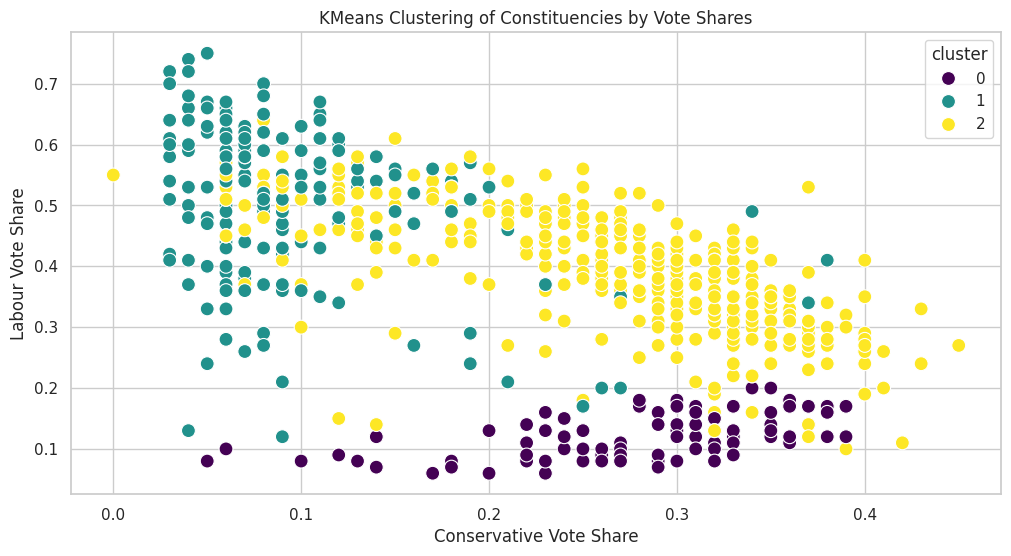

In [85]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'YouGov_2024_general_election_MRP_2.xlsx'
df = pd.read_excel(file_path, sheet_name='data-5sWjS (1)')

# Prepare data for clustering
vote_shares = df[['ConShare', 'LabShare', 'LibDemShare', 'GreenShare', 'ReformShare', 'PlaidShare', 'SNPShare', 'OthersShare']]
scaler = StandardScaler()
scaled_vote_shares = scaler.fit_transform(vote_shares)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_vote_shares)

# Visualize the clustering results
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ConShare', y='LabShare', hue='cluster', data=df, palette='viridis', s=100)
plt.title('KMeans Clustering of Constituencies by Vote Shares')
plt.xlabel('Conservative Vote Share')
plt.ylabel('Labour Vote Share')
plt.show()


The scatter plot above shows the results of the KMeans clustering analysis. Constituencies are clustered into three groups based on their vote shares for various parties, with different colors representing different clusters.

In the plot:

The x-axis represents the Conservative vote share.

The y-axis represents the Labour vote share.

Each point represents a constituency, and the color indicates the cluster to which it belongs.

# Analysis or project i would like to in the future:


Geographical Analysis:

Create maps showing the geographical distribution of party support.
Highlight strongholds and battlegrounds on a map.

Time-Series Analysis:

If historical data is available, perform a time-series analysis to identify trends in party support over multiple election cycles.

Demographic Analysis:

Analyze the data in conjunction with demographic information to identify patterns in voting behavior.

Machine Learning Predictions:

Build machine learning models to predict the election outcomes based on various factors.
Evaluate model performance and refine predictions.

